@author: Octavio Gutiérrez de Código Máquina

URL del canal: https://www.youtube.com/CodigoMaquina

URL del video: https://youtu.be/Z-bFsyiQxb0 

# Regresión Logística
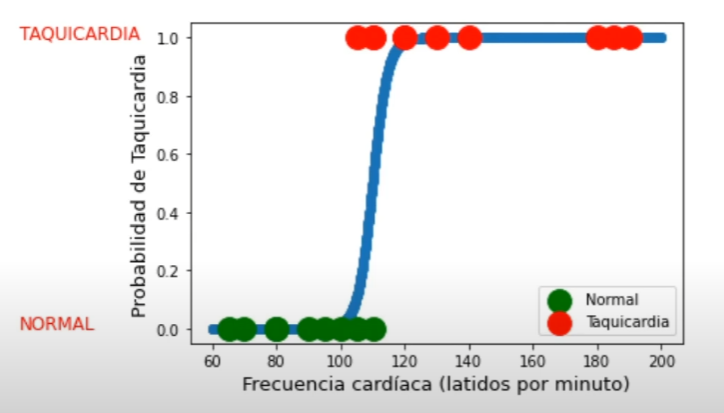

<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>

## Función Logística Estándar
#### 
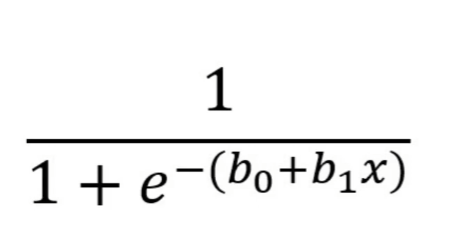

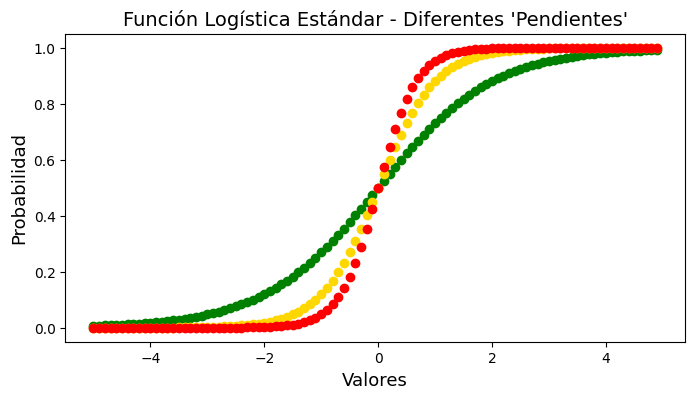

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Creamos una función logística vectorial (ufuncs)
logistica = np.frompyfunc(lambda b0, b1, x:
                         1 / (1 + math.exp(-(b0 + b1*x))),
                         3, 1)

# Graficamos la función logística
plt.figure(figsize=(8, 4))

# Diferentes pendientes
plt.scatter(np.arange(-5, 5, 0.1),
           logistica(0, 1, np.arange(-5, 5, 0.1)),
           color="green")

plt.scatter(np.arange(-5, 5, 0.1),
           logistica(0, 2, np.arange(-5, 5, 0.1)),
           color="gold")

plt.scatter(np.arange(-5, 5, 0.1),
           logistica(0, 3, np.arange(-5, 5, 0.1)),
           color="red")

plt.title("Función Logística Estándar - Diferentes 'Pendientes'", fontsize=14.0)
plt.ylabel("Probabilidad", fontsize=13.0)
plt.xlabel("Valores", fontsize=13.0)
plt.show()


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>

# Taquicardia: Probabilidad y Clase

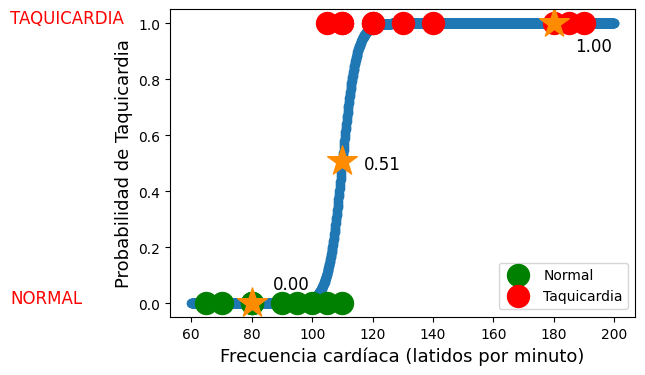

In [2]:
# Persona Normal de 60 a 100 latidos por minuto.
# Persona con Taquicardia de hasta 220 latidos por minuto.
personas_normal = [65, 70, 80, 80, 80,
                   90, 95, 100, 105, 110]

personas_taquicardia = [105, 110, 110, 120, 120,
                        130, 140, 180, 185, 190]

# Graficamos una función logística
plt.figure(figsize=(6, 4))

# y = b0 + b1x    
#
# y = -46.68057196 + 0.42460226x

plt.scatter(np.arange(60, 200, 0.1), 
            logistica(-46.68057196, 0.42460226,
                      np.arange(60, 200, 0.1)))  

# Graficamos la frecuencia cardíaca de las personas 
plt.scatter(personas_normal, [0]*10, 
            marker="o", c="green", s=250, label="Normal")    
plt.scatter(personas_taquicardia, [1]*10, 
            marker="o", c="red", s=250, label="Taquicardia")    

# Graficamos las probabilidades para tres (3) individuos
individuos = [80, 110, 180]

probalidades = logistica(-46.68057196, 0.42460226, individuos)

plt.scatter(individuos, probalidades,
            marker="*", c="darkorange", s=500)

plt.text(individuos[0]+7, 0.05, "%0.2f" % probalidades[0],
         size=12, color="black")
plt.text(individuos[1]+7, 0.48, "%0.2f" % probalidades[1],
         size=12, color="black")
plt.text(individuos[2]+7, 0.90, "%0.2f" % probalidades[2],
         size=12, color="black")
plt.text(0, 1, "TAQUICARDIA", size=12, color="red")
plt.text(0, 0, "NORMAL", size=12, color="red")
plt.ylabel("Probabilidad de Taquicardia", fontsize=13.0)
plt.xlabel("Frecuencia cardíaca (latidos por minuto)", fontsize=13.0)
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()



<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>


# Máxima Verosimilitud

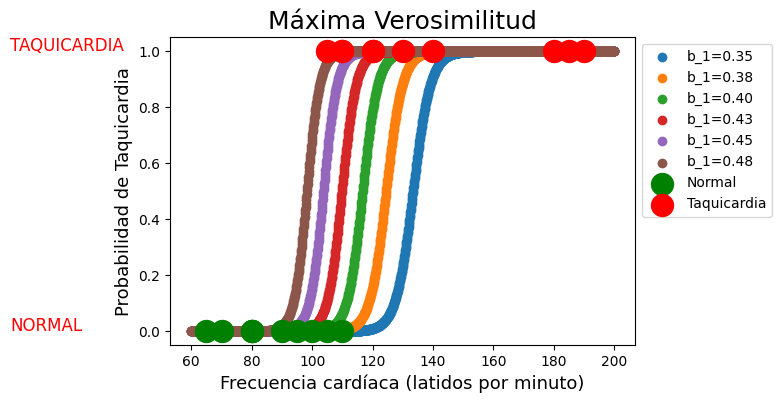

In [3]:
# Diferentes funciones logísticas con diferentes "pendientes"
plt.figure(figsize=(6, 4))

for b1 in np.arange(0.35, 0.49, 0.025):
    plt.scatter(np.arange(60, 200, 0.1), 
                logistica(-46.68057196,
                          b1,
                          np.arange(60, 200, 0.1)),
                label="b_1=%0.2f" % b1)  
   
# Graficamos la frecuencia cardíaca de las personas 
plt.scatter(personas_normal, [0]*10, 
            marker="o", c="green", s=250, label="Normal")    
plt.scatter(personas_taquicardia, [1]*10, 
            marker="o", c="red", s=250, label="Taquicardia")     

plt.title("Máxima Verosimilitud", fontsize=18.0)
plt.text(0, 1, "TAQUICARDIA", size=12, color="red")
plt.text(0, 0, "NORMAL", size=12, color="red")
plt.ylabel("Probabilidad de Taquicardia", fontsize=13.0)
plt.xlabel("Frecuencia cardíaca (latidos por minuto)", fontsize=13.0)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>
    

# Modelo de Regresión Logística

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

frecuencias_cardiacas = [[65], [70], [80], [80], [80],
                         [90], [95], [100], [105], [110],
                         [105], [110], [110], [120], [120],
                         [130], [140], [180], [185], [190]]

clase = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Creamos conjuntos de entrenamiento y de prueba del modelo
datos_entrena, datos_prueba, clase_entrena, clase_prueba = \
    train_test_split(frecuencias_cardiacas,
                     clase, 
                     test_size=0.30)

# Creamos el modelo de Regresión Logística
modelo = LogisticRegression().fit(datos_entrena, clase_entrena)
np.set_printoptions(suppress=True)
print(modelo.predict(datos_prueba))
print(modelo.predict_proba(datos_prueba))
print(modelo.score(datos_prueba, clase_prueba))
print(modelo.intercept_, modelo.coef_)


[1 1 1 1 0 0]
[[0.         1.        ]
 [0.00107483 0.99892517]
 [0.0204634  0.9795366 ]
 [0.0204634  0.9795366 ]
 [0.99998265 0.00001735]
 [0.99999606 0.00000394]]
1.0
[-31.72447346] [[0.29660763]]


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>

# Suposiciones

<ul>
<li>Dos clases</li>
<li>No outliers (datos anómalos)</li>
<li>Observaciones independientes</li>
<li>No hay altas inter-correlaciones</li>
<li>Muestra relativamente grande</li>
<li>Relación lineal entre las probabilidades logarítmicas y las variables predictoras</li>
</ul>
<img src="imagenes/regresion_logistica_matplotlib.png"  width="450" align="left">

<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>